In [406]:
#SNOWFLAKE CONNECTION
import snowflake.connector

#CONNECT TO SNOWFLAKE
user='***************************'
password ='***************************'
ctx = snowflake.connector.connect( user=user, 
                                  password=password, 
                                  account='***************************'

#DATA MANIPULATION
import pandas as pd
import numpy as np

#CLUSTERING ALGORITHM
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing

#SUPRESS WARNINGS
import warnings
warnings.filterwarnings('ignore')

#ELBOW/KNEE METHODS
import kneed
from kneed import DataGenerator, KneeLocator

#GET THE FINAL DATABASE AS A PANDAS TYPE DATAFRAME
cs = ctx.cursor()
cs.execute('USE WAREHOUSE ANALYST_WH_5')
cs.execute('select * from item')
df = cs.fetch_pandas_all()

#BACKUP COPY OF THE DATAFRAME
backup = df.copy()

#PRINTING THE FIRST ROWS
df.head()

,BRANDNAME,IDBRAND,IDPRODUCT,IDITEM,IDPRODUCTCOLOR,MAIN_COMPOSANT,IDSEASON,COLORNAME,SIZE,SHELF,DEPARTMENT,FAMILY,SUBFAMILY,NAMETARGETIMPLEMENTATION,SUPPLIERNAME,CODECOUNTRY,SELLING_PRICE_EUR
0,DE FURSAC,5.0,5-10009666,5-134432,5-10009666-09,None,5-E19,TOURTERELLE,48,Homme,DESSUS,Trench / imper,Trench / imper,Tous Les Magasins,LENER CORDIER,IE,201.92
1,DE FURSAC,5.0,5-10005741,5-72789,5-10005741-30,None,5-E14,MARINE,50,Homme,DESSUS,Veste,Veste,Tous Les Magasins,APOLON-95 LTD,BE,255.77
2,DE FURSAC,5.0,5-10007466,5-100808,5-10007466-33,None,5-E15,INDIGO,36,Homme,BAS,Pantalon,Pantalon,Tous Les Magasins,APOLON-95 LTD,CH,71.15
3,DE FURSAC,5.0,5-10010245,5-142961,5-10010245-32,None,5-E19,PETROLE,37,Homme,COSTUMES & SMOKINGS,Pantalon,Pantalon de costume,Tous Les Magasins,APOLON-95 LTD,LU,132.69
4,DE FURSAC,5.0,5-10006262,5-81601,5-10006262-31,None,5-E16,CARBONE,48,Homme,DESSUS,Manteau,Doudoune,Tous Les Magasins,CELTO SARL SARL,FR,545.00


In [407]:
## DATA CLEANING
#ID-PRODUCT/ITEM AS AN INDEX (THIS VARIABLE IS NOT A PREDICTION FEATURE)
df.set_index(['IDPRODUCT','IDITEM'],inplace = True)

#MODIFY ID SEASON INTO YEAR + SEASON COLUMN
df['IDSEASON']=df['IDSEASON'].str[2:]
df["SEASON"] = df["IDSEASON"].copy()
df['SEASON'].replace(['E19', 'E14', 'E15', 'E16', 'H19', 'PER', 'E09', 'H14', 'H18','DEM', 'E13', 'H20', 'E21', 'REP', 'H13', 'H15', 'H16', 'H09','E18', 'E22', 'H22', 'H21', 'H17', 'H12', 'E12', 'E20', 'E10','H11', 'H10', 'E11', 'E17', 'E08', 'H08', 'H07', 'CONSO', 'OLD','AM', 'PACK', 'H06', 'E07', 'BRH11', 'BRE12', 'BRH12', 'BRE13','BRH14', 'PE13', 'E06', 'BRAD', 'H05', 'GIFT', 'PEM', 'PERM','BRH13', 'BRH17', 'BRE14', 'PUB', 'E05', 'BRE19', 'PH12', 'BRH16'],
                     ['ETE', 'ETE', 'ETE', 'ETE', 'ETE', 'PER', 'ETE', 'HIVER', 'HIVER','DEM', 'ETE', 'HIVER', 'ETE', 'REP', 'HIVER', 'HIVER', 'HIVER', 'HIVER','ETE', 'ETE', 'HIVER', 'HIVER', 'HIVER', 'HIVER', 'ETE', 'ETE', 'ETE','HIVER', 'HIVER', 'ETE', 'ETE', 'ETE', 'HIVER', 'HIVER', 'CONSO', 'OLD','AM', 'PACK', 'HIVER', 'ETE', 'BRADERIE HIVER', 'BRADERIE ETE', 'BRADERIE HIVER', 'BRADERIE ETE','BRADERIE HIVER', 'PE', 'ETE', 'BRAD', 'HIVER', 'GIFT', 'PEM', 'PERM','BRADERIE HIVER', 'BRADERIE HIVER', 'BRADERIE ETE', 'PUB', 'ETE', 'BRADERIE ETE', 'PH', 'BRADERIE HIVER'],inplace = True)
df = df.rename(columns={'IDSEASON': 'YEAR'})
df['YEAR'].replace(['E19', 'E14', 'E15', 'E16', 'H19', 'PER', 'E09', 'H14', 'H18','DEM', 'E13', 'H20', 'E21', 'REP', 'H13', 'H15', 'H16', 'H09','E18', 'E22', 'H22', 'H21', 'H17', 'H12', 'E12', 'E20', 'E10','H11', 'H10', 'E11', 'E17', 'E08', 'H08', 'H07', 'CONSO', 'OLD','AM', 'PACK', 'H06', 'E07', 'BRH11', 'BRE12', 'BRH12', 'BRE13','BRH14', 'PE13', 'E06', 'BRAD', 'H05', 'GIFT', 'PEM', 'PERM','BRH13', 'BRH17', 'BRE14', 'PUB', 'E05', 'BRE19', 'PH12', 'BRH16'],
                   ['2019', '2014', '2015', '2016', '2019', 'INCONNU', '2009', '2014', '2018','INCONNU', '2013', '2020', '2021', 'REP', '2013', '2015', '2016', '2009','2018', '2022', '2022', '2021', '2017', '2012', '2012', '2020', '2010','2011', '2010', '2011', '2017', '2008', '2008', '2007', 'INCONNU', 'INCONNU','INCONNU', 'INCONNU', '2006', '2007', '2011', '2012', '2012', '2013','2014', '2013', '2006', 'BRAD', '2005', 'INCONNU', 'INCONNU', 'INCONNU','2013', '2017', '2014', 'PUB', '2005', '2019', '2012', '2016'],inplace = True)

#DROP SUPPLIERNAME COLUMN
df.drop(["SUPPLIERNAME"], axis = 1, inplace = True)

#DROP IDPRODUCTCOLOR COLUMN
df.drop(["IDPRODUCTCOLOR"], axis = 1, inplace = True)

#CLEAR THE BLANK VALUES IN BRAND NAME
df.loc[df.BRANDNAME == 'SANDRO', 'IDBRAND'] = 1
df.loc[df.BRANDNAME == 'MAJE', 'IDBRAND'] = 2
df.loc[df.BRANDNAME == 'CLAUDIE', 'IDBRAND'] = 3
df.loc[df.BRANDNAME == 'DE FURSAC', 'IDBRAND'] = 5
df.loc[df.BRANDNAME == 1, 'IDBRAND'] = 'SANDRO'
df.loc[df.BRANDNAME == 2, 'IDBRAND'] = 'MAJE'
df.loc[df.BRANDNAME == 3, 'IDBRAND'] = 'CLAUDIE'
df.loc[df.BRANDNAME == 5, 'IDBRAND'] = 'DE FURSAC'
df.loc[df.BRANDNAME == 5, 'IDBRAND'] = 'DE FURSAC'
df['BRANDNAME'].replace(['DE FURSAC'],['DE_FURSAC'],inplace = True)

#DROP IDBRAND COLUMN
df.drop(["IDBRAND"], axis = 1, inplace = True)

#MODIFY THE UNIQUE NUMERICAL FEATURE TO CATEGORICAL THANKS TO BINS
df['PRICE_RANGE'] = pd.cut(df['SELLING_PRICE_EUR'], bins = [-np.inf,50,150,300,np.inf],
                           labels = ["0-50","50-150","150-300","300+"])

#DROP SELLING_PRICE_EUR COLUMN
df.drop(["SELLING_PRICE_EUR"], axis = 1, inplace = True)

#FILL NA VALUES
df["MAIN_COMPOSANT"].fillna("Composant inconnu", inplace = True)
df["COLORNAME"].fillna("Couleur inconnue", inplace = True)
df["DEPARTMENT"].fillna("Departement inconnu", inplace = True)
df["FAMILY"].fillna("Famille inconnue", inplace = True)
df["SUBFAMILY"].fillna("Sous-famille inconnue", inplace = True)

df.head()

,,BRANDNAME,MAIN_COMPOSANT,YEAR,COLORNAME,SIZE,SHELF,DEPARTMENT,FAMILY,SUBFAMILY,NAMETARGETIMPLEMENTATION,CODECOUNTRY,SEASON,PRICE_RANGE
IDPRODUCT,IDITEM,,,,,,,,,,,,,
5-10009666,5-134432,DE_FURSAC,Composant inconnu,2019,TOURTERELLE,48,Homme,DESSUS,Trench / imper,Trench / imper,Tous Les Magasins,IE,ETE,150-300
5-10005741,5-72789,DE_FURSAC,Composant inconnu,2014,MARINE,50,Homme,DESSUS,Veste,Veste,Tous Les Magasins,BE,ETE,150-300
5-10007466,5-100808,DE_FURSAC,Composant inconnu,2015,INDIGO,36,Homme,BAS,Pantalon,Pantalon,Tous Les Magasins,CH,ETE,50-150
5-10010245,5-142961,DE_FURSAC,Composant inconnu,2019,PETROLE,37,Homme,COSTUMES & SMOKINGS,Pantalon,Pantalon de costume,Tous Les Magasins,LU,ETE,50-150
5-10006262,5-81601,DE_FURSAC,Composant inconnu,2016,CARBONE,48,Homme,DESSUS,Manteau,Doudoune,Tous Les Magasins,FR,ETE,300+


In [408]:
#CREATE A DICTIONNARY FOR SUBSETS
clusters = {}

#CREATE SUBSETS
for brand in ['DE_FURSAC', 'SANDRO', 'MAJE', 'CLAUDIE']:
    for season in ['ETE', 'HIVER']:
        for country in df['CODECOUNTRY'].unique():
            cluster_name = str(brand)+"_"+str(season)+"_"+str(country)
            clusters[cluster_name] = df.loc[(df['BRANDNAME'] == brand) & (df['SEASON']== season) & (df['CODECOUNTRY']== country)
                                            ,df.columns]

In [421]:
[(key,len(clusters[key])) for key in clusters]

[('DE_FURSAC_ETE_IE', 59762),
 ('DE_FURSAC_ETE_BE', 119685),
 ('DE_FURSAC_ETE_CH', 83120),
 ('DE_FURSAC_ETE_LU', 119621),
 ('DE_FURSAC_ETE_FR', 119702),
 ('DE_FURSAC_ETE_GB', 69019),
 ('DE_FURSAC_ETE_ES', 59450),
 ('DE_FURSAC_ETE_DE', 0),
 ('DE_FURSAC_ETE_US', 0),
 ('DE_FURSAC_ETE_TW', 0),
 ('DE_FURSAC_ETE_HK', 0),
 ('DE_FURSAC_ETE_SG', 0),
 ('DE_FURSAC_ETE_CA', 0),
 ('DE_FURSAC_ETE_SE', 0),
 ('DE_FURSAC_ETE_IT', 0),
 ('DE_FURSAC_ETE_MO', 0),
 ('DE_FURSAC_ETE_PT', 0),
 ('DE_FURSAC_ETE_NZ', 0),
 ('DE_FURSAC_ETE_QA', 0),
 ('DE_FURSAC_ETE_RE', 0),
 ('DE_FURSAC_ETE_CN', 0),
 ('DE_FURSAC_ETE_MC', 0),
 ('DE_FURSAC_ETE_NL', 0),
 ('DE_FURSAC_ETE_KR', 0),
 ('DE_FURSAC_ETE_SA', 0),
 ('DE_FURSAC_ETE_DK', 0),
 ('DE_FURSAC_ETE_RU', 0),
 ('DE_FURSAC_ETE_NO', 0),
 ('DE_FURSAC_ETE_GR', 0),
 ('DE_FURSAC_ETE_AE', 0),
 ('DE_FURSAC_ETE_AU', 0),
 ('DE_FURSAC_ETE_MY', 0),
 ('DE_FURSAC_ETE_TR', 0),
 ('DE_FURSAC_ETE_LB', 0),
 ('DE_FURSAC_ETE_PL', 0),
 ('DE_FURSAC_ETE_MA', 0),
 ('DE_FURSAC_ETE_JP', 0),
 ('DE_F

In [454]:
#THIS FUNCTIONS CREATE SUB-SUBSETS WITH THE K-MODE ALGRITHM
def k_modes(keys, k):
    knees = []
    elbows = []
    clusts = []
    output = []
    costs = []
    for key in keys:
        #WE START BY DROPING USELESS COLUMNS
        subset = clusters[key].copy()
        subset.drop(["BRANDNAME","SEASON","CODECOUNTRY"], axis = 1, inplace = True)
        
        #THEN WE ENCODE THE FEATURES (CATEGORICAL) WITH VALUES BETWEEN 0 AND (N-1) (N = NUMBER OF CLASSES)
        le = preprocessing.LabelEncoder()
        subset = subset.apply(le.fit_transform)
        
        #AT THIS POINT, WE RUN THEE KMODES ALGORITHM AND WE COLLECT THE COST FUNCTION RESULT FOR K IN (1,...,K) (PARAMETER OF k_modes())
        cost = []
        clus = []
        for num_clusters in list(range(1,k+1)):
            kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
            kmode.fit_predict(subset)
            cost.append(kmode.cost_)
            
            fitClusters_cao = kmode.fit_predict(subset)
            subset_copy = subset.copy()
            subset_copy["Cluster"] = fitClusters_cao
            clus.append(subset_copy)
            
        #WE COMPUTE THE GOOD NUMBER OF CLUSTERS TO PICK WITH THE KNEE LIBRARY FUNCTION KneeLocator (WITH BOTH ELBOW AND KNEE METHODS)
        x = np.array([i for i in range(1,k+1,1)])
        cost = np.array(cost)
        kneedle = KneeLocator(x = x, y = cost, S=0, curve="convex", direction="decreasing")
        knee = kneedle.knee
        elbow = kneedle.elbow
        
        #WE ADD THE RESULTS (CLUSTERS + IDEAL NUMBER OF CLUSTERS TO THE OUTPUT)
        knees.append(knee)
        elbows.append(elbow)
        clusts.append(clus)
        costs.append(cost)
    for i in range(len(elbows)):
        output.append(clusts[i][elbows[i]-1])
    return(elbows, clusts, output)

In [422]:
elbows, clusts, output = k_modes(keys = ['SANDRO_HIVER_SA', 'MAJE_HIVER_AE', 'CLAUDIE_HIVER_ES', 'DE_FURSAC_ETE_CH'], k = 15)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 57352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 57352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 143, cost: 50721.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 143, cost: 50721.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 48208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 48208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 250, cost: 46125.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iter

In [ ]:
#THIS FUNCTIONS CREATE SUB-SUBSETS WITH THE K-MODE ALGRITHM + RETURNS THE COSTS/NUMBER OF CLUSTERS
def k_modes(keys, k):
    knees = []
    elbows = []
    clusts = []
    output = []
    costs = []
    for key in keys:
        #WE START BY DROPING USELESS COLUMNS
        subset = clusters[key].copy()
        subset.drop(["BRANDNAME","SEASON","CODECOUNTRY"], axis = 1, inplace = True)
        
        #THEN WE ENCODE THE FEATURES (CATEGORICAL) WITH VALUES BETWEEN 0 AND (N-1) (N = NUMBER OF CLASSES)
        le = preprocessing.LabelEncoder()
        subset = subset.apply(le.fit_transform)
        
        #AT THIS POINT, WE RUN THEE KMODES ALGORITHM AND WE COLLECT THE COST FUNCTION RESULT FOR K IN (1,...,K) (PARAMETER OF k_modes())
        cost = []
        clus = []
        for num_clusters in list(range(1,k+1)):
            kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
            kmode.fit_predict(subset)
            cost.append(kmode.cost_)
            
            fitClusters_cao = kmode.fit_predict(subset)
            subset_copy = subset.copy()
            subset_copy["Cluster"] = fitClusters_cao
            clus.append(subset_copy)
            
        #WE COMPUTE THE GOOD NUMBER OF CLUSTERS TO PICK WITH THE KNEE LIBRARY FUNCTION KneeLocator (WITH BOTH ELBOW AND KNEE METHODS)
        x = np.array([i for i in range(1,k+1,1)])
        cost = np.array(cost)
        kneedle = KneeLocator(x = x, y = cost, S=0, curve="convex", direction="decreasing")
        knee = kneedle.knee
        elbow = kneedle.elbow
        
        #WE ADD THE RESULTS (CLUSTERS + IDEAL NUMBER OF CLUSTERS TO THE OUTPUT)
        knees.append(knee)
        elbows.append(elbow)
        clusts.append(clus)
        costs.append(cost)
    for i in range(len(elbows)):
        output.append(clusts[i][elbows[i]-1])
    return(elbows, clusts, output, costs)

In [455]:
elbows_2, clusts_2, output_2, costs_2 = k_modes(keys = ['SANDRO_HIVER_SA'], k = 15)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 57352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 57352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 143, cost: 50721.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 143, cost: 50721.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 48208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 48208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 250, cost: 46125.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iter

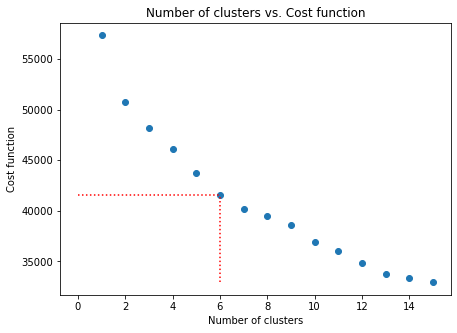

In [494]:
#IN THIS CELL, WE PLOT THE IDEAL NUMBER OF SAMPLES FOR BRAND = SANDRO, SEASON = WINTER AND COUNTRY = SAUDI ARABIA
elbows_2, clusts_2, output_2, costs_2 = k_modes(keys = ['SANDRO_HIVER_SA'], k = 15)

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

ax.scatter(x = range(1,16,1),y = costs_2[0])
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Cost function")
ax.vlines(elbows_2[0],ymin = min(costs_2[0]),ymax= costs_2[0][elbows_2[0]-1],color = 'red', linestyles = 'dotted')
ax.hlines(costs_2[0][elbows_2[0]-1],xmin = 0, xmax = elbows_2[0] ,color = 'red', linestyles = 'dotted')
ax.title.set_text('Number of clusters vs. Cost function')

plt.savefig('Cost vs f(k).png')